## GMM - Gaussian Mixture Model

### Introduction to GMM(Gaussian Mixture Model)

Base of GMM: Datasets are mixture of multiple Gaussian Dist.  
1. Extract multiple Gaussian Dist. from dataset.  
2. Decide label of data  
For parameter estimation, GMM use EM(Expectaton and Maximization) method

Hyperparameter of GMM  
- n_components[Default=1]: # of Gaussian Dist.(Similar to n_clusters in K-Mean)

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [2]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=3).fit(iris.data)
gmm_cluster_labels = GMM.predict(iris.data)
iris_df['gmm_cluster'] = gmm_cluster_labels

# Check target-prediction using groupby
iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [3]:
# For comparision,import K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)
iris_df['kmeans_cluster'] = kmeans.labels_
# Use groupby method to check consistency of target and cluster
iris_result = iris_df.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM vs K-Means

K-Means is useful when shape of clusters are circular.  
GMM is flexible for variable datasets but need more time for clustering.

In [4]:
### Source Code from ml-definitive-guide-master ###
## Visualize Clustering Results or make_blobs()
# Function Factors
# clusterobj: Sklearn clustering Class object after fit_predict.
# dataframe: feature-label dataframe
# label_name: label_name
# iscenter: If cluster class object offer cluster centroid, True

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

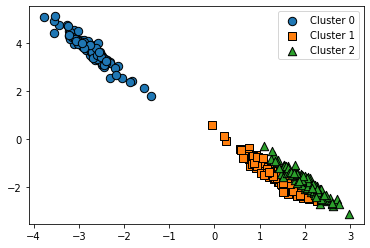

In [49]:
from sklearn.datasets import make_blobs
# Apply random_state=0 to make same result as textbook or sourcecode.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5)

# Transformation Matrix to generate oval shaped dataset
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

cluster_df = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
 
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

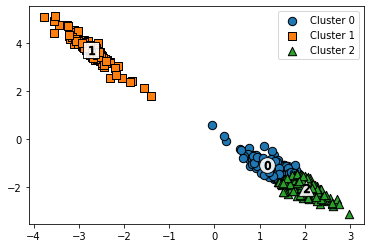

In [50]:
# Apply K-Means to oval-shaped dataset. 
kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(X_aniso)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label',iscenter=True)

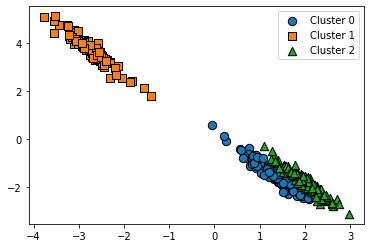

In [51]:
# Apply GMM 
GMM = GaussianMixture(n_components=3)
gmm_label = GMM.fit(X_aniso).predict(X_aniso)
cluster_df['gmm_label'] = gmm_label

# GMM does not have center -> iscenter=False 
visualize_cluster_plot(GMM, cluster_df, 'gmm_label', iscenter=False)

In [52]:
# Check Clustering Result
print('### KMeans Clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(cluster_df.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       1               100
1       0                64
        2                36
2       2                75
        0                25
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       1            100
1       0             98
        2              2
2       2             98
        0              2
Name: gmm_label, dtype: int64
